In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/small.zip'

In [ ]:
import matplotlib.pyplot as plt  # plotting library
import scipy                     # scientific computnig and technical computing
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import glob                      # return a possibly-empty list of path names that match pathname
import os                        # dealing with directories
import pandas as pd              # providing data structures and data analysis tools
import tensorflow as tf       
import itertools
import random
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#import train and test data 
train_data='/content/small/train'
test_data='/content/small/test'

In [ ]:
train_data

'/content/small/train'

In [ ]:
#list of classes 
os.listdir('/content/small/train')

['bicycle', 'car', 'motorcycle', 'bus']

/content/small/train/bicycle
(117, 144, 3)
/content/small/train/car
(269, 939, 3)
/content/small/train/motorcycle
(387, 392, 3)
/content/small/train/bus
(1227, 2586, 3)


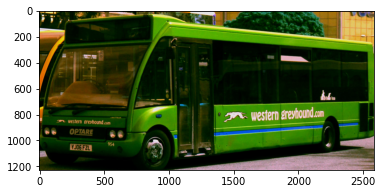

In [ ]:
#add path
a=os.listdir(train_data)
for i in a:
    b=os.path.join(train_data,i)
    print(b)
    c=os.listdir(os.path.join(train_data,i))
    for j in c:
        d=os.path.join(b,j)
        img=cv2.imread(d)
        print(img.shape)
        
        plt.imshow(img)
        break

In [ ]:
LR = 0.1
height=150
width=150
channels=3
seed=1337
batch_size = 128
num_classes = 4
epochs = 20
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_data, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_data, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=True,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples

Found 1529 images belonging to 4 classes.
Found 1254 images belonging to 4 classes.


In [ ]:
x,y=validation_generator.next()

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150, 150, 3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
os.getcwd()

'/content'

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=10,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              verbose = 1
                             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
11/11 [==============================] - 102s 9s/step - loss: 1.7910 - acc: 0.2420 - val_loss: 1.3782 - val_acc: 0.2717
Epoch 2/10
11/11 [==============================] - 89s 8s/step - loss: 1.3692 - acc: 0.3155 - val_loss: 1.3427 - val_acc: 0.4054
Epoch 3/10
11/11 [==============================] - 92s 9s/step - loss: 1.3206 - acc: 0.3969 - val_loss: 1.2663 - val_acc: 0.4549
Epoch 4/10
11/11 [==============================] - 93s 9s/step - loss: 1.2373 - acc: 0.4690 - val_loss: 1.1708 - val_acc: 0.4991
Epoch 5/10
11/11 [==============================] - 93s 9s/step - loss: 1.1928 - acc: 0.4911 - val_loss: 1.2739 - val_acc: 0.3863
Epoch 6/10
11/11 [==============================] - 91s 9s/step - loss: 1.1819 - acc: 0.5011 - val_loss: 1.1903 - val_acc: 0.4540
Epoch 7/10
11/11 [==============================] - 88s 8s/step - loss: 1.1592 - acc: 0.5153 - val_loss: 1.1310 - val_acc: 0.5312
Epoch 8/10
11/11 [==============================] - 90s 8s/step - loss: 1.0956 - acc: 0.5

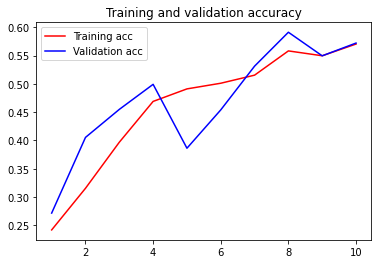

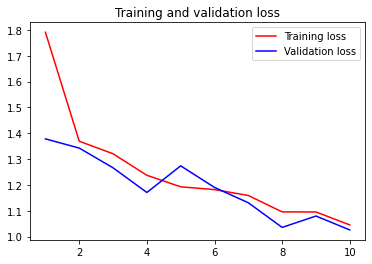

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
score = model.evaluate(validation_generator)

10/10 [==============================] - 35s 3s/step - loss: 0.8567 - acc: 0.6515


In [ ]:
score

[0.8567354679107666, 0.6515151262283325]

In [ ]:
y_pred=model.predict(validation_generator)
y_pred[:5]

array([[0.04769464, 0.4350577 , 0.04046826, 0.47677943],
       [0.06554605, 0.3436951 , 0.22080062, 0.36995822],
       [0.04064841, 0.8604743 , 0.06465323, 0.03422409],
       [0.00766949, 0.6365571 , 0.31524834, 0.04052513],
       [0.03243368, 0.11719331, 0.37489998, 0.475473  ]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 3, 1, 1, 3]

In [ ]:
classes=['bicycle', 'motorcycle', 'car', 'bus']

bus


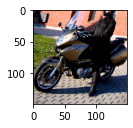

bus


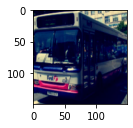

motorcycle


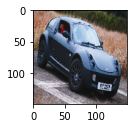

motorcycle


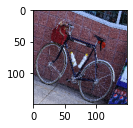

bus


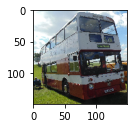

car


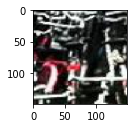

motorcycle


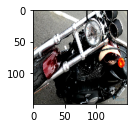

bus


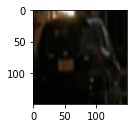

motorcycle


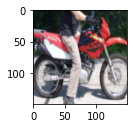

car


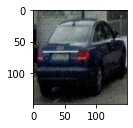

In [ ]:
x,y = validation_generator.next()

for i in range(0,10):
    plt.figure(figsize=(20,10))
    image = x[i]
    actual=y[i]
    plt.subplot(5,5,i+1)
    plt.imshow(image)
    print(classes[y_classes[i]])
    plt.show()